In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees
import pandas
import seaborn
import matplotlib

In [3]:
from rpy2 import robjects

# tell R to be quiet
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings( 'ignore', category=RRuntimeWarning )
robjects.r( 'options( warn = -1 )' )
robjects.r( 'sink( "/dev/null" )' )

# load libraries into the R global context
robjects.r( 'library("phytools")' )
robjects.r( 'library("igraph")' )

def plot_cophylo( host, guest, links, X, Y, output ) :
    
    # plot cophylogeny using R
    r_code = '''
    tr1 <- read.tree( "HOST_TREE" )
    tr2 <- read.tree( "GUEST_TREE" )
    links <- read.csv( "LINKS", row.names=1, stringsAsFactors = F )
    im <- graph_from_incidence_matrix( as.matrix( links ) )
    assoc <- as_edgelist( im )
    obj <- cophylo( tr1, tr2, assoc=assoc )
    pdf( "OUTFILE", width = XX, height = YY )
    plot( obj )
    dev.off()
    '''
    r_code = r_code.replace( 'HOST_TREE', host )
    r_code = r_code.replace( 'GUEST_TREE', guest )
    r_code = r_code.replace( 'LINKS', links )
    r_code = r_code.replace( 'OUTFILE', output )
    r_code = r_code.replace( 'XX', str(X) )
    r_code = r_code.replace( 'YY', str(Y) )
    
    robjects.r( r_code )

In [4]:
gl_host  = SuchTree( '../../SuchTree/data/gopher-louse/gopher.tree' )
gl_guest = SuchTree( '../../SuchTree/data/gopher-louse/lice.tree' )
gl_links = pandas.read_csv( '../../SuchTree/data/gopher-louse/links.csv', index_col=0 )

plot_cophylo( '../../SuchTree/data/gopher-louse/gopher.tree',
              '../../SuchTree/data/gopher-louse/lice.tree',
              '../../SuchTree/data/gopher-louse/links.csv',
              5, 5, 'figures/gopher_louse_cophylo.pdf' )

gl_SLT = SuchLinkedTrees( gl_host, gl_guest, gl_links )

sm_host  = SuchTree( '../../SuchTree/data/sedge-smut/host.tree' )
sm_guest = SuchTree( '../../SuchTree/data/sedge-smut/guest.tree' )
sm_links = pandas.read_csv( '../../SuchTree/data/sedge-smut/links.csv', index_col=0 )

plot_cophylo( '../../SuchTree/data/sedge-smut/host.tree',
              '../../SuchTree/data/sedge-smut/guest.tree',
              '../../SuchTree/data/sedge-smut/links.csv',
              8, 8, 'figures/sedge_smut_cophylo.pdf' )

sm_SLT = SuchLinkedTrees( sm_host, sm_guest, sm_links )

fw_host  = SuchTree( '../../SuchTree/data/fish-worm/host.tree' )
fw_guest = SuchTree( '../../SuchTree/data/fish-worm/guest.tree' )
fw_links = pandas.read_csv( '../../SuchTree/data/fish-worm/links.csv', index_col=0 )

plot_cophylo( '../../SuchTree/data/fish-worm/host.tree',
              '../../SuchTree/data/fish-worm/guest.tree',
              '../../SuchTree/data/fish-worm/links.csv',
              25, 25, 'figures/fish_worm_cophylo.pdf' )

fw_SLT = SuchLinkedTrees( fw_host, fw_guest, fw_links )

In [5]:
gl_ld = gl_SLT.linked_distances()
sm_ld = sm_SLT.linked_distances()
fw_ld = fw_SLT.linked_distances()

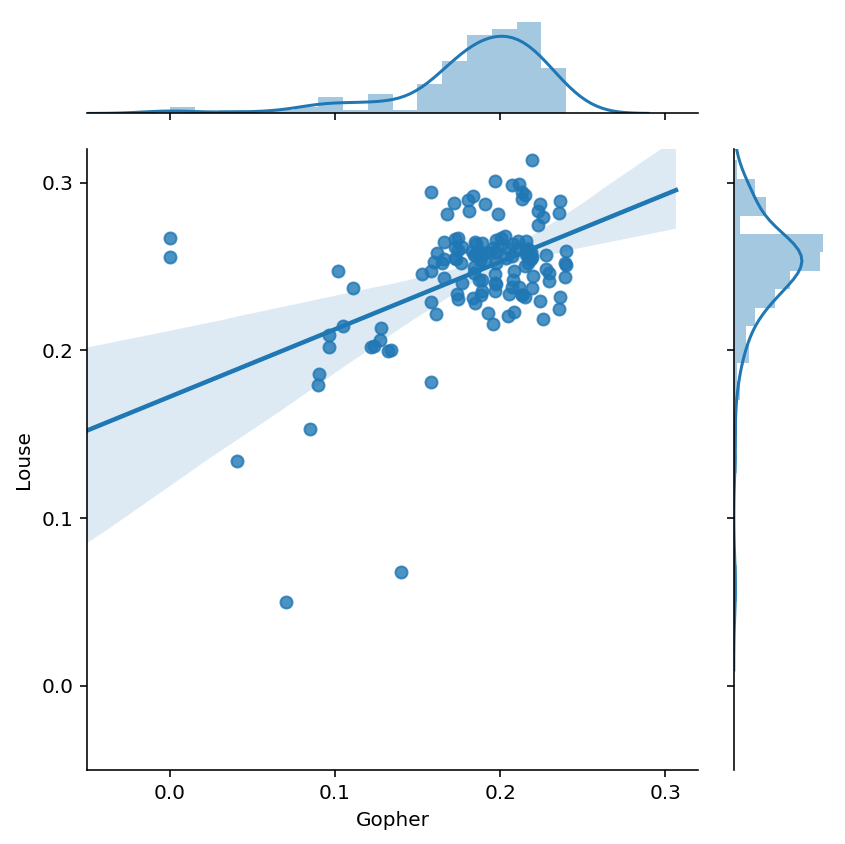

In [6]:
seaborn.jointplot( gl_ld['TreeA'], gl_ld['TreeB'], stat_func=None, kind='reg' )
xlabel( 'Gopher' )
ylabel( 'Louse' )
xticks( [ 0.0, 0.1, 0.2, 0.3 ] )
yticks( [ 0.0, 0.1, 0.2, 0.3 ] )
xlim( -0.05, 0.32 )
ylim( -0.05, 0.32 )

tight_layout()
savefig( 'figures/gopher_louse_correlation.pdf' )

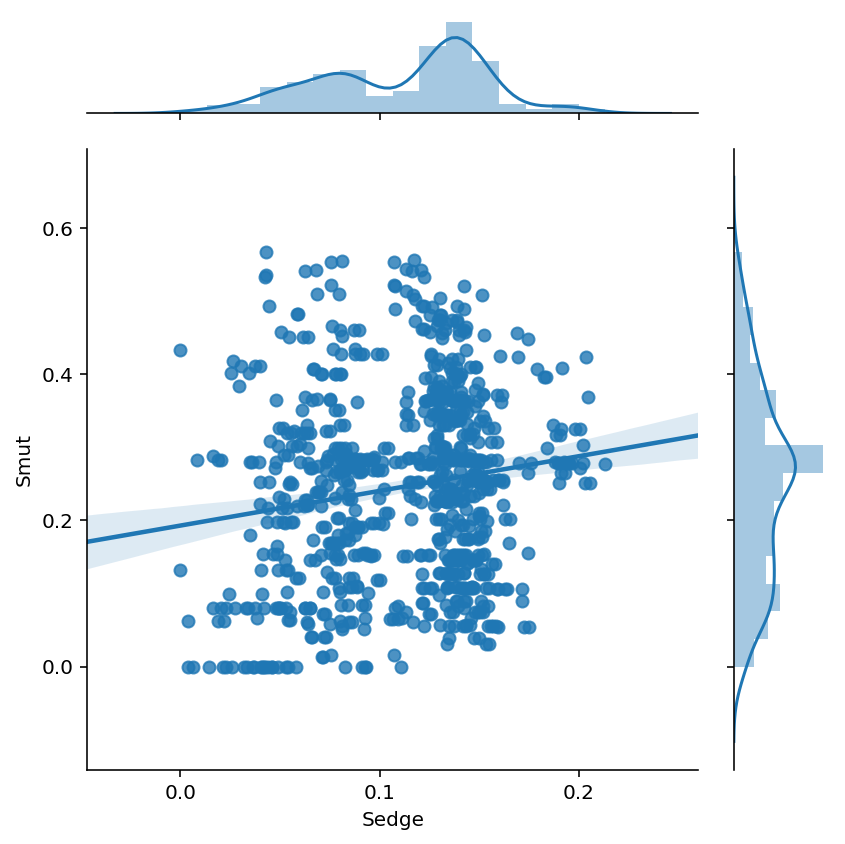

In [7]:
seaborn.jointplot( sm_ld['TreeA'], sm_ld['TreeB'], stat_func=None, kind='reg' )
xlabel( 'Sedge' )
ylabel( 'Smut' )
xticks( [ 0.0, 0.1, 0.2 ] )
yticks( [ 0.0, 0.2, 0.4, 0.6 ] )

tight_layout()
savefig( 'figures/sedge_smut_correlation.pdf' )

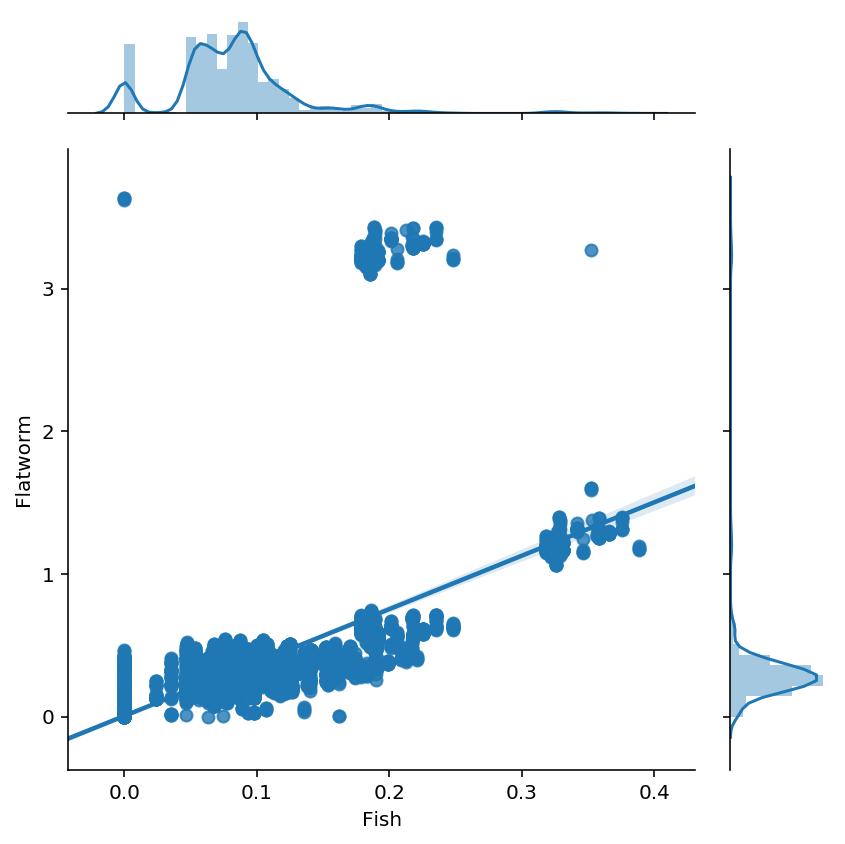

In [8]:
seaborn.jointplot( fw_ld['TreeA'], fw_ld['TreeB'], stat_func=None, kind='reg' )
xlabel( 'Fish' )
ylabel( 'Flatworm' )
xticks( [ 0.0, 0.1, 0.2, 0.3, 0.4 ] )
yticks( [ 0.0, 1.0, 2.0, 3.0 ] )

tight_layout()
savefig( 'figures/fish_worm_correlation.pdf' )

In [9]:
from dendropy import Tree

def tree_labels( treefile ) :
    t = Tree.get( file=open(treefile), schema='newick' )
    labels = []
    for node in t.inorder_node_iter() :
        if node.label :
            labels.append( node.label )
        else :
            labels.append( node.taxon.label )
    return labels

with open( 'data/tiny_tree_A.tree', 'w' ) as f :
    #f.write( '(A:1,(B:1,(C:1,D:1)E:1)F:1)G:1;' )
    f.write( '(A:2,(B:1,C:1)D:1)E:1;' )
    
with open( 'data/tiny_tree_B.tree', 'w' ) as f :
    f.write( '((a:1,b:1)e:1,(c:1,d:1)f:1)g:1;' )

T1 = SuchTree( 'data/tiny_tree_A.tree' )
t1_labels = tree_labels( 'tiny_tree_A.tree' )
t1_labels = [ t1_labels[i] for i in T1.adjacency()['node_ids'] ]

T2 = SuchTree( 'data/tiny_tree_B.tree' )
t2_labels = tree_labels( 'tiny_tree_B.tree' )
t2_labels = [ t2_labels[i] for i in T2.adjacency()['node_ids'] ]


links = pandas.DataFrame( zeros( (3,4), dtype=int ), index=T1.leafs.keys(), columns=T2.leafs.keys() )

for i,j in ( ('A','a'), ('B','c'), ('B','d'), ('C','d'), ('C','d') ) :
    links.at[i,j] = 1

links.to_csv( 'data/tiny_tree_links.csv' )

SLT = SuchLinkedTrees( T1, T2, links )

adj = pandas.DataFrame( numpy.ceil( SLT.adjacency() ), dtype=int, 
                        index=t1_labels+t2_labels,
                        columns=t1_labels+t2_labels)

IOError: [Errno 2] No such file or directory: 'tiny_tree_A.tree'

In [ ]:
plot_cophylo( 'data/tiny_tree_A.tree',
              'data/tiny_tree_B.tree',
              'data/tiny_tree_links.csv',
              2, 2, 'figures/tiny_tree_cophylo.pdf' )

In [ ]:
figure( figsize=(4,4) )

gs = matplotlib.gridspec.GridSpec( 2, 2,
                                   width_ratios=[5, 7],
                                   height_ratios=[7,5], )

subplot( gs[0,0] )
ax3 = seaborn.heatmap( adj[ t1_labels ].loc[ t2_labels ],
                       cbar=False, square=True, annot=True,
                       xticklabels=False, yticklabels=True )
ax3.invert_yaxis()

subplot( gs[0,1] )
ax2 = seaborn.heatmap( adj[ t2_labels ].loc[ t2_labels ],
                       cbar=False, square=True, annot=True,
                       xticklabels=False, yticklabels=False )
ax2.invert_yaxis()

subplot( gs[1,0] )
ax1 = seaborn.heatmap( adj[ t1_labels ].loc[ t1_labels ], 
                       cbar=False, square=True, annot=True,
                       xticklabels=True, yticklabels=True )
ax1.invert_yaxis()

subplot( gs[1,1] )
ax4 = seaborn.heatmap( adj[ t2_labels ].loc[ t1_labels ],
                       cbar=False, square=True, annot=True,
                       xticklabels=True, yticklabels=False )
ax4.invert_yaxis()

gs.tight_layout(gcf(), pad=0, w_pad=0 )

savefig( 'figures/tiny_tree_adjacency.pdf' )

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.]])

In [213]:
set( t1_sfeal.keys() )

{0, 2, 4, 6}

In [214]:
set( SLT.linklist[:,1] )

{0, 2, 4, 6}

In [215]:
T1.adjacency()

{'adjacency_matrix': array([[0., 1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.]]),
 'node_ids': array([1, 0, 3, 2, 5, 4, 6])}